In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from firecrown.likelihood.likelihood import NamedParameters
import numpy as np
import sacc
import pyccl as ccl
import sys
import os
import pylab as plt
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
from smokescreen import ConcealDataVector

In [2]:
sys.path.append("../examples/supernovae/")
import sn_likelihood

In [3]:
sacc_file = "../examples/supernovae/sn_datavector.sacc"
sacc_data = sacc.Sacc.load_fits(sacc_file)
build_parameters =  NamedParameters({
    "sacc_data": sacc_data,
})

In [4]:
# the only way of accessing this part of the data in sacc for some reason
z_list = []
for dp in sacc_data.data:
    z_temp = dp['z']
    z_list.append(z_temp)
z_list = np.array(z_list)

## Testing the datavector blinding for the SNe Ia analysis

In [5]:
cosmo = ccl.CosmologyVanillaLCDM()
syst_dict = {
    "sn_ddf_sample_M": -19.3,
    }
shift_dict = {"h": (-0.25, 0.25), "Omega_c": (-0.2, 0.2)}
sck = ConcealDataVector(cosmo, syst_dict, sn_likelihood, shift_dict, sacc_data, seed=6, **{'debug': True})

[DEBUG] Shifts: {'h': 0.8664300757180008, 'Omega_c': 0.18279192212047088}
[DEBUG] Concealed Cosmology: <pyccl.cosmology.Cosmology>
	Neff    = 3.044
	Omega_b = 0.05
	Omega_c = 0.18279192212047088
	h       = 0.8664300757180008
	n_s     = 0.96
	sigma8  = 0.81
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0x8799d9d6624e618c


In [6]:
sck.calculate_concealing_factor(factor_type='mult')
concealed_datavect = sck.apply_concealing_to_likelihood_datavec()

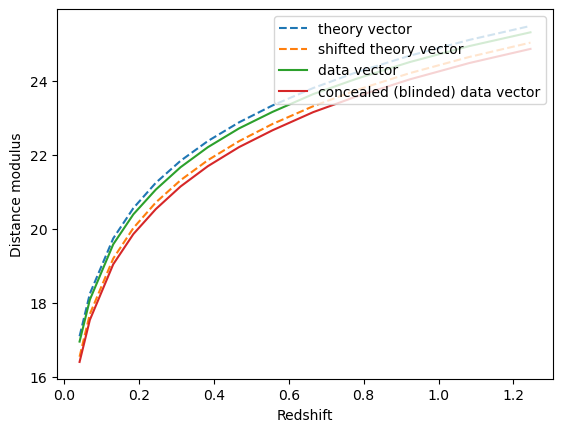

In [8]:
plt.figure()
plt.plot(z_list, sck.theory_vec_fid, ls='--', label='theory vector')
plt.plot(z_list, sck.theory_vec_conceal, ls='--', label='shifted theory vector')
plt.plot(z_list, sck.likelihood.get_data_vector(), label='data vector')
plt.plot(z_list, concealed_datavect, label='concealed (blinded) data vector')
plt.legend(loc=1)
plt.xlabel(r'Redshift')
plt.ylabel(r'Distance modulus')
plt.show()

In [10]:
# delete the blinded data vector before saving it to avoid errors:
if os.path.exists("../examples/supernovae/sn_datavector_concealed_data_vector.fits"):
    os.remove("../examples/supernovae/sn_datavector_concealed_data_vector.fits")

sck.save_concealed_datavector("../examples/supernovae/", "sn_datavector")